# Collection models (SF, MF, & COM)

In [1]:
# Import libraries
import swolfpy as sp
import swolfpy_inputdata as spid
import swolfpy_processmodels as sppm
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set font for plots
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "14"

# Set specs for pandas
pd.set_option('display.max_colwidth', 0)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 200)
pd.set_option("precision", 2)

In [2]:
# Treatment processes
ProcessMetaData = sppm.ProcessModelsMetaData.ProcessModelsMetaData
Treatment_processes = {}
Treatment_processes['LF'] = {'input_type':ProcessMetaData['LF']['InputType'] , 'model':sppm.LF()}
Treatment_processes['Composting'] = {'input_type':ProcessMetaData['Comp']['InputType'] , 'model':sppm.Comp()}
Treatment_processes['AD'] = {'input_type':ProcessMetaData['AD']['InputType'] , 'model':sppm.AD()}
Treatment_processes['WTE'] = {'input_type':ProcessMetaData['WTE']['InputType'] , 'model':sppm.WTE()}
Treatment_processes['SS_MRF'] = {'input_type':ProcessMetaData['SS_MRF']['InputType'] , 'model':sppm.SS_MRF()}
Treatment_processes['Reprocessing'] = {'input_type':ProcessMetaData['Reproc']['InputType'] , 'model':sppm.Reproc()}
Treatment_processes['TS'] = {'input_type':ProcessMetaData['TS']['InputType'] , 'model':sppm.TS()}

# Distance
Processes = ['LF', 'Composting', 'AD', 'WTE', 'SS_MRF', 'Reprocessing', 'TS', 'Collection']
data = sppm.Distance.create_distance_table(process_names=Processes,
                                           transport_modes=['Heavy Duty Truck'],
                                           default_dist=20)
data['Heavy Duty Truck'].loc['LF', 'TS'] = 0.0
data['Heavy Duty Truck'].loc[:, 'Collection'] = [30, 30, 30, 30, 30, 30, 30, None]
distance = sppm.Distance(data)          
data['Heavy Duty Truck']

,LF,Composting,AD,WTE,SS_MRF,Reprocessing,TS,Collection
LF,NaN,20.0,20.0,20.0,20.0,20.0,0.0,30.0
Composting,NaN,NaN,20.0,20.0,20.0,20.0,20.0,30.0
AD,NaN,NaN,NaN,20.0,20.0,20.0,20.0,30.0
WTE,NaN,NaN,NaN,NaN,20.0,20.0,20.0,30.0
SS_MRF,NaN,NaN,NaN,NaN,NaN,20.0,20.0,30.0
Reprocessing,NaN,NaN,NaN,NaN,NaN,NaN,20.0,30.0
TS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0
Collection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
scheme = ('RWC', 'N/A', 'N/A')
scheme_SF=sppm.SF_Col.scheme()
scheme_SF[scheme] = 1
SF = sppm.SF_Col('Collection', scheme_SF, Treatment_processes=Treatment_processes, Distance=distance)
SF.calc()

scheme_MF=sppm.MF_Col.scheme()
scheme_MF[scheme] = 1
MF = sppm.MF_Col('Collection', scheme_MF, Treatment_processes=Treatment_processes, Distance=distance)
MF.calc()

scheme_COM=sppm.COM_Col.scheme()
scheme_COM[scheme] = 1
COM = sppm.COM_Col('Collection', scheme_COM, Treatment_processes=Treatment_processes, Distance=distance)
COM.calc()

# Compare Input Data

In [4]:
def compare_col(param, scheme):
    scheme_SF=sppm.SF_Col.scheme()
    scheme_SF[scheme] = 1
    SF = sppm.SF_Col('Collection', scheme_SF, Treatment_processes=Treatment_processes, Distance=distance)
    SF.calc()

    scheme_MF=sppm.MF_Col.scheme()
    scheme_MF[scheme] = 1
    MF = sppm.MF_Col('Collection', scheme_MF, Treatment_processes=Treatment_processes, Distance=distance)
    MF.calc()

    scheme_COM=sppm.COM_Col.scheme()
    scheme_COM[scheme] = 1
    COM = sppm.COM_Col('Collection', scheme_COM, Treatment_processes=Treatment_processes, Distance=distance)
    COM.calc()
    
    fig, ax =plt.subplots(1, 1, figsize=(16,4))
    res = pd.concat([SF.col[param], MF.col[param], COM.col[param]], join='outer', axis=1, keys=['SF','MF','COM'])
    res.plot.bar(ax=ax)
    ax.tick_params(rotation=0)
    return res.T

### TL: Loading time at one service stop (min/stop)

,RWC,SSR,DSR,MSR,LV,SSYW,SSO,ORG,DryRes,REC,WetRes,MRDO,SSYWDO,MSRDO
SF,0.19,0.19,0.45,0.45,0.15,0.19,0.19,0.45,NaN,0.45,NaN,NaN,NaN,NaN
MF,5.00,5.00,5.00,5.00,20.00,5.00,5.00,5.00,NaN,5.00,NaN,NaN,NaN,NaN
COM,5.00,5.00,5.00,5.00,NaN,5.00,5.00,5.00,NaN,5.00,NaN,NaN,NaN,NaN


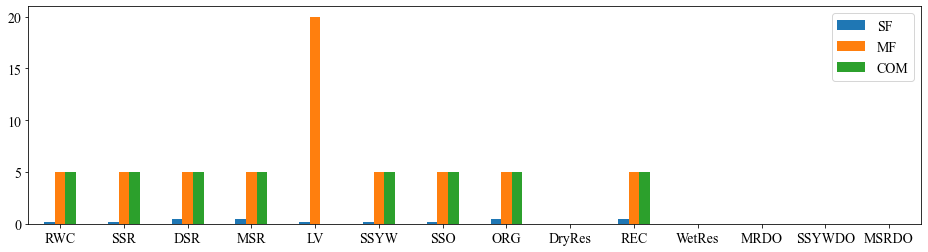

In [5]:
compare_col('TL', ('RWC', 'N/A', 'N/A'))

### S: Time to unload at disposal facility                  (min/trip)

,RWC,SSR,DSR,MSR,LV,SSYW,SSO,ORG,DryRes,REC,WetRes,MRDO,SSYWDO,MSRDO
SF,16.0,16.0,20.0,20.0,16.0,16.0,16.0,32.0,NaN,32.0,NaN,NaN,NaN,NaN
MF,16.0,16.0,20.0,20.0,16.0,16.0,16.0,32.0,NaN,32.0,NaN,NaN,NaN,NaN
COM,16.0,16.0,20.0,20.0,NaN,16.0,16.0,32.0,NaN,32.0,NaN,NaN,NaN,NaN


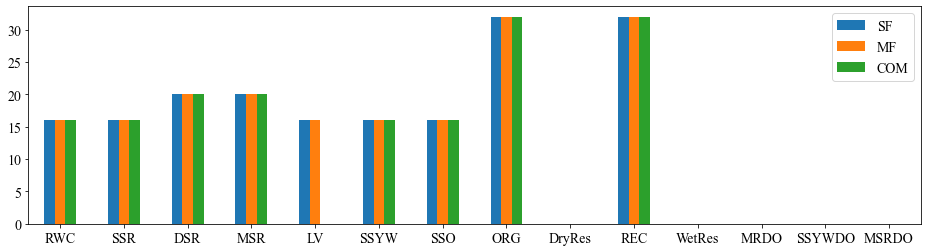

In [6]:
compare_col('S', ('RWC', 'N/A', 'N/A'))

### Tbtw: Travel time between service stops  (min/stop)

,RWC,SSR,DSR,MSR,LV,SSYW,SSO,ORG,DryRes,REC,WetRes,MRDO,SSYWDO,MSRDO
SF,0.2,0.22,0.22,0.22,0.2,0.22,0.22,0.2,0.2,0.2,0.2,0.2,0.22,0.22
MF,0.2,0.20,0.20,0.20,0.2,0.20,0.20,0.2,0.2,0.2,0.2,NaN,NaN,0.20
COM,0.2,0.20,0.20,0.20,NaN,0.20,0.20,0.2,0.2,0.2,0.2,NaN,NaN,0.20


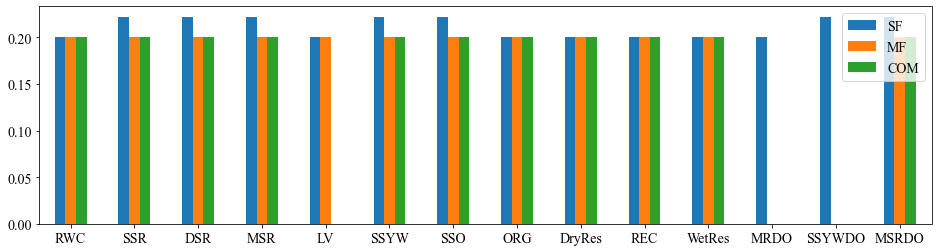

In [7]:
compare_col('Tbtw', ('RWC', 'N/A', 'N/A'))

### Trf: Travel time btwn route and disposal fac.  (min/trip)

,RWC,SSR,DSR,MSR,LV,SSYW,SSO,ORG,DryRes,REC,WetRes,MRDO,SSYWDO,MSRDO
SF,20.34,20.34,21.82,21.82,21.82,20.34,20.34,20.34,21.82,20.34,21.82,20.34,20.34,21.82
MF,20.34,20.34,21.82,21.82,21.82,20.34,20.34,20.34,21.82,20.34,21.82,NaN,NaN,21.82
COM,20.34,20.34,21.82,21.82,NaN,20.34,20.34,20.34,21.82,20.34,21.82,NaN,NaN,21.82


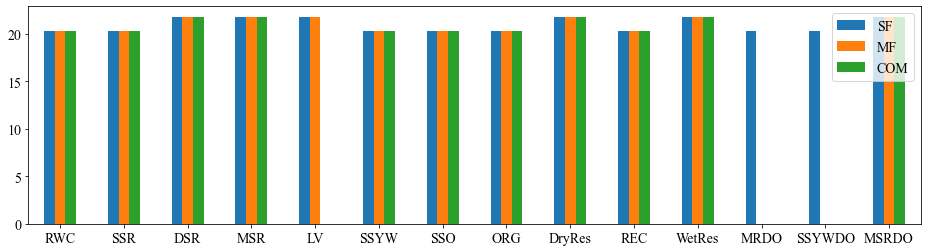

In [8]:
compare_col('Trf', ('RWC', 'N/A', 'N/A'))

### Tgr: Time from grg to 1st collection route             (min/day-vehicle)

,RWC,SSR,DSR,MSR,LV,SSYW,SSO,ORG,DryRes,REC,WetRes,MRDO,SSYWDO,MSRDO
SF,6.86,6.86,6.86,6.86,6.86,6.86,6.86,6.86,6.86,6.86,6.86,6.86,6.86,6.86
MF,6.86,6.86,6.86,6.86,6.86,6.86,6.86,6.86,6.86,6.86,6.86,NaN,NaN,6.86
COM,6.86,6.86,6.86,6.86,NaN,6.86,6.86,6.86,6.86,6.86,6.86,NaN,NaN,6.86


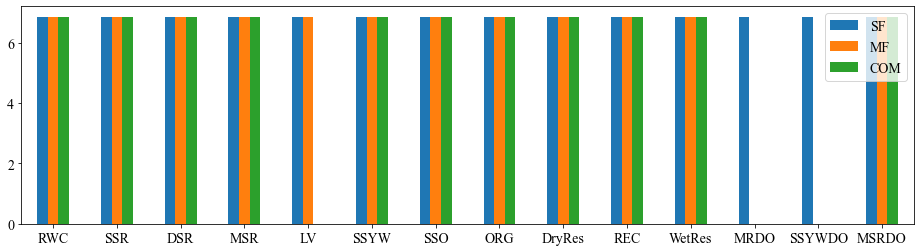

In [9]:
compare_col('Tgr', ('RWC', 'N/A', 'N/A'))

### Tfg: Time from disposal fac. to garage (min/day-vehicle)

,RWC,SSR,DSR,MSR,LV,SSYW,SSO,ORG,DryRes,REC,WetRes,MRDO,SSYWDO,MSRDO
SF,24.7,24.7,26.18,26.18,26.18,24.7,24.7,24.7,26.18,24.7,26.18,24.7,24.7,26.18
MF,24.7,24.7,26.18,26.18,26.18,24.7,24.7,24.7,26.18,24.7,26.18,NaN,NaN,26.18
COM,24.7,24.7,26.18,26.18,NaN,24.7,24.7,24.7,26.18,24.7,26.18,NaN,NaN,26.18


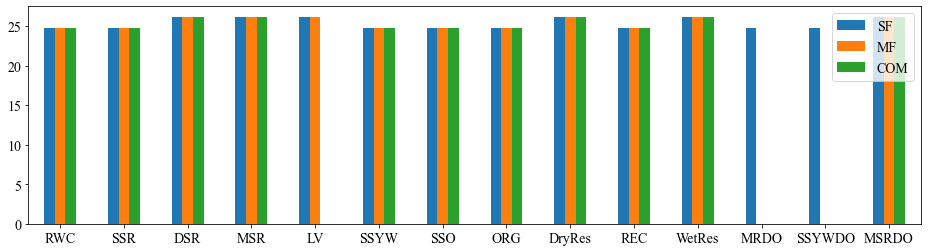

In [10]:
compare_col('Tfg', ('RWC', 'N/A', 'N/A'))

### Nw: Number of additional collectors per vehicle (perrson/vehicle)

,RWC,SSR,DSR,MSR,LV,SSYW,SSO,ORG,DryRes,REC,WetRes,MRDO,SSYWDO,MSRDO
SF,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN
MF,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN
COM,1.0,0.0,1.0,1.0,NaN,0.0,0.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN


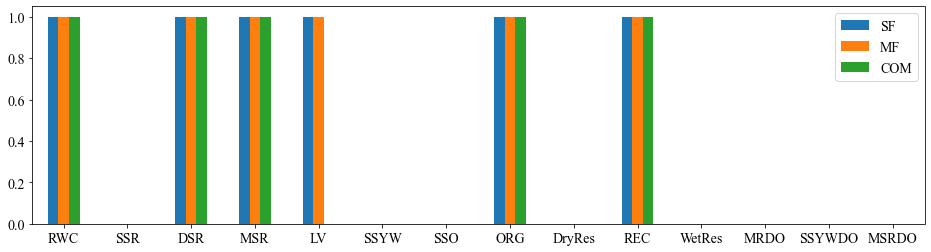

In [11]:
compare_col('Nw', ('RWC', 'N/A', 'N/A'))

,SF,MF,COM
Yard_Trimmings_Leaves,4.50e-02,4.50e-02,1.40e-02
Yard_Trimmings_Grass,4.50e-02,4.50e-02,1.10e-02
Yard_Trimmings_Branches,4.50e-02,4.50e-02,1.10e-02
Food_Waste_Vegetable,1.18e-01,1.18e-01,6.00e-02
Food_Waste_Non_Vegetable,3.90e-02,3.90e-02,6.00e-02
Wood,4.40e-02,4.40e-02,3.40e-02
Wood_Other,2.60e-02,2.60e-02,0.00e+00
Textiles,6.40e-02,6.40e-02,4.60e-02
Rubber_Leather,3.50e-02,3.50e-02,0.00e+00
Newsprint,1.40e-02,1.40e-02,4.20e-02


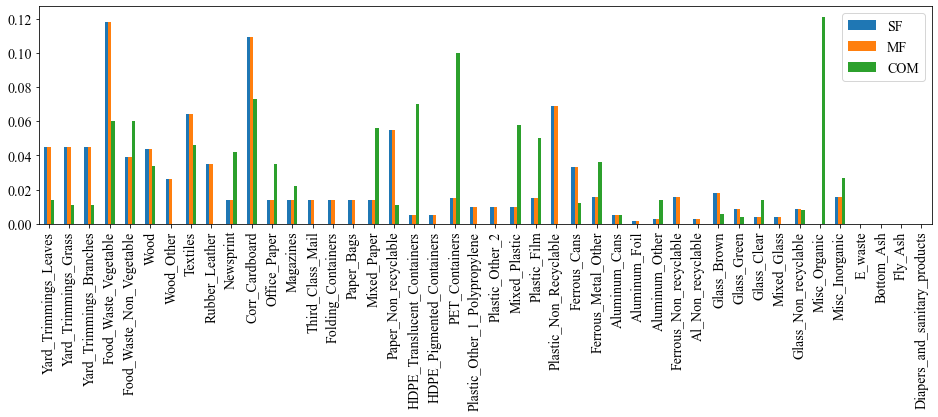

In [12]:
Composition = pd.concat([SF.process_data['Comp'], MF.process_data['Comp'], COM.process_data['Comp']],
                        join='outer',
                        axis=1,
                        keys=['SF','MF','COM'])
fig, ax =plt.subplots(1, 1, figsize=(16,4))
Composition.plot.bar(ax=ax)
Composition

# Comparison of Results

In [13]:
def compare(scheme, Columns):
    scheme_SF=sppm.SF_Col.scheme()
    scheme_SF[scheme] = 1
    SF = sppm.SF_Col('Collection', scheme_SF, Treatment_processes=Treatment_processes, Distance=distance)
    SF.calc()
    
    scheme_MF=sppm.MF_Col.scheme()
    scheme_MF[scheme] = 1
    MF = sppm.MF_Col('Collection', scheme_MF, Treatment_processes=Treatment_processes, Distance=distance)
    MF.calc()
    
    scheme_COM=sppm.COM_Col.scheme()
    scheme_COM[scheme] = 1
    COM = sppm.COM_Col('Collection', scheme_COM, Treatment_processes=Treatment_processes, Distance=distance)
    COM.calc()    
    
    index = ['SF', 'MF', 'COM']
    
    print('trips per day per vehicle (trip/day-vehicle)')
    print(pd.DataFrame((SF.col['RD'], MF.col['RD'], COM.col['RD']), index=index, columns=Columns))
    print('='*40)

    print('Fuel use per Mg of refuse (L/Mg)')
    print(pd.DataFrame((SF.col['FuelMg'], MF.col['FuelMg'], COM.col['FuelMg']), index=index, columns=Columns))
    print('='*40)

    print('Cost per Mg')
    print(pd.DataFrame((SF.col['C_collection'], MF.col['C_collection'], COM.col['C_collection']), index=index, columns=Columns))
    print('='*40)

    print('daily weight of refuse collected per vehicle (tons/vehicle-day)')
    print(pd.DataFrame((SF.col['RefD'], MF.col['RefD'], COM.col['RefD']), index=index, columns=Columns))
    print('='*40)
    
    print('number of collection stops per day (stops/vehicle-day)')
    print(pd.DataFrame((SF.col['SD'], MF.col['SD'], COM.col['SD']), index=index, columns=Columns))
    print('='*40)
    
    print('total number of trucks')
    print(pd.DataFrame((SF.col['Nt'], MF.col['Nt'], COM.col['Nt']), index=index, columns=Columns))
    print('='*40)

## RWC collection

In [14]:
compare(('RWC', 'N/A', 'N/A'), ['RWC'])

trips per day per vehicle (trip/day-vehicle)
      RWC
SF   2.37
MF   5.13
COM  4.29
Fuel use per Mg of refuse (L/Mg)
      RWC
SF   5.44
MF   3.50
COM  3.63
Cost per Mg
       RWC
SF   34.34
MF   15.64
COM  18.70
daily weight of refuse collected per vehicle (tons/vehicle-day)
       RWC
SF   24.08
MF   52.08
COM  43.57
number of collection stops per day (stops/vehicle-day)
        RWC
SF   623.83
MF   16.86 
COM  25.96 
total number of trucks
       RWC
SF   11.92
MF   5.51 
COM  7.70 


## RWC + SSYW collection

In [15]:
compare(('RWC', 'SSYW', 'N/A'), ['RWC', 'SSYW'])

trips per day per vehicle (trip/day-vehicle)
      RWC  SSYW
SF   2.16  0.90
MF   4.96  3.32
COM  4.23  0.84
Fuel use per Mg of refuse (L/Mg)
      RWC   SSYW
SF   5.75  25.60
MF   3.52  9.04 
COM  3.64  16.36
Cost per Mg
       RWC    SSYW
SF   37.62  136.26
MF   16.18  35.88 
COM  18.93  142.38
daily weight of refuse collected per vehicle (tons/vehicle-day)
       RWC   SSYW
SF   21.99  3.92 
MF   50.35  14.45
COM  43.02  3.64 
number of collection stops per day (stops/vehicle-day)
        RWC    SSYW
SF   653.58  791.63
MF   18.70   36.49 
COM  26.54   63.44 
total number of trucks
       RWC  SSYW
SF   11.38  9.39
MF   4.97   2.55
COM  7.54   3.15


## RWC + SSR collection

In [16]:
compare(('RWC', 'N/A', 'SSR'), ['RWC', 'SSR'])

trips per day per vehicle (trip/day-vehicle)
      RWC   SSR
SF   1.96  1.25
MF   4.77  3.96
COM  3.70  3.33
Fuel use per Mg of refuse (L/Mg)
      RWC    SSR
SF   6.12  15.34
MF   3.55  6.68 
COM  3.76  6.98 
Cost per Mg
       RWC    SSR
SF   41.60  75.70
MF   16.82  23.22
COM  21.66  27.66
daily weight of refuse collected per vehicle (tons/vehicle-day)
       RWC    SSR
SF   19.91  7.04 
MF   48.42  22.33
COM  37.61  18.74
number of collection stops per day (stops/vehicle-day)
        RWC     SSR
SF   683.32  743.65
MF   20.78   29.47 
COM  32.33   36.38 
total number of trucks
       RWC    SSR
SF   10.88  10.00
MF   4.47   3.15 
COM  6.19   5.50 


## RWC + SSYW + SSR collection

In [17]:
compare(('RWC', 'SSYW', 'SSR'), ['RWC', 'SSYW', 'SSR'])

trips per day per vehicle (trip/day-vehicle)
      RWC  SSYW   SSR
SF   1.71  0.90  1.25
MF   4.50  3.32  3.96
COM  3.62  0.84  3.33
Fuel use per Mg of refuse (L/Mg)
      RWC   SSYW    SSR
SF   6.69  25.60  15.34
MF   3.60  9.04   6.68 
COM  3.79  16.36  6.98 
Cost per Mg
       RWC    SSYW    SSR
SF   47.65  136.26  75.70
MF   17.81  35.88   23.22
COM  22.16  142.38  27.66
daily weight of refuse collected per vehicle (tons/vehicle-day)
       RWC   SSYW    SSR
SF   17.39  3.92   7.04 
MF   45.74  14.45  22.33
COM  36.76  3.64   18.74
number of collection stops per day (stops/vehicle-day)
        RWC    SSYW     SSR
SF   719.17  791.63  743.65
MF   23.64   36.49   29.47 
COM  33.24   63.44   36.38 
total number of trucks
       RWC  SSYW    SSR
SF   10.34  9.39  10.00
MF   3.93   2.55  3.15 
COM  6.02   3.15  5.50 


## RWC + SSO + SSR collection

In [18]:
compare(('RWC', 'SSO', 'SSR'), ['RWC', 'SSO', 'SSR'])

trips per day per vehicle (trip/day-vehicle)
      RWC   SSO   SSR
SF   1.51  1.42  1.25
MF   4.26  4.22  3.96
COM  3.42  2.06  3.33
Fuel use per Mg of refuse (L/Mg)
      RWC    SSO    SSR
SF   7.28  18.06  15.34
MF   3.64  8.51   6.68 
COM  3.84  10.55  6.98 
Cost per Mg
       RWC    SSO    SSR
SF   53.96  86.10  75.70
MF   18.84  28.24  23.22
COM  23.41  57.94  27.66
daily weight of refuse collected per vehicle (tons/vehicle-day)
       RWC    SSO    SSR
SF   15.37  6.19   7.04 
MF   43.24  18.36  22.33
COM  34.80  8.95   18.74
number of collection stops per day (stops/vehicle-day)
        RWC     SSO     SSR
SF   748.00  720.36  743.65
MF   26.31   26.73   29.47 
COM  35.33   50.21   36.38 
total number of trucks
      RWC    SSO    SSR
SF   9.94  10.32  10.00
MF   3.53  3.48   3.15 
COM  5.66  3.98   5.50 
